In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
list_df = pd.read_csv("listings.csv")
trans_df = pd.read_csv("transactions.csv")

In [3]:
# Convert all timestamps to normal time stamps
trans_df['create_timestamp'] = pd.to_datetime(trans_df['create_timestamp'], unit='s')
trans_df['created_timestamp'] = pd.to_datetime(trans_df['created_timestamp'], unit='s')
trans_df['paid_timestamp'] = pd.to_datetime(trans_df['paid_timestamp'], unit='s')
trans_df['shipped_timestamp'] = pd.to_datetime(trans_df['shipped_timestamp'], unit='s')

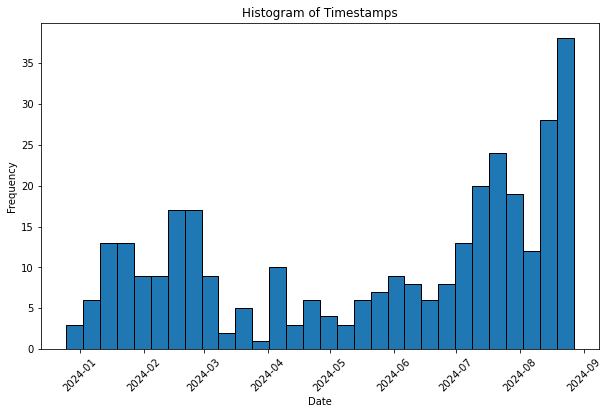

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(trans_df['create_timestamp'], bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Timestamps')
plt.xticks(rotation=45)
plt.show()

In [5]:
trans_df['hour'] = trans_df['create_timestamp'].dt.hour
trans_df['time_period'] = pd.cut(trans_df['hour'], bins=[0, 3, 6, 9, 12, 15, 18, 21, 24], labels=['12am-3am', '3am-6am', '6am-9am', '9am-12pm', '12pm-3pm', '3pm-6pm', '6pm-9pm', '9pm-12am'], right=False)


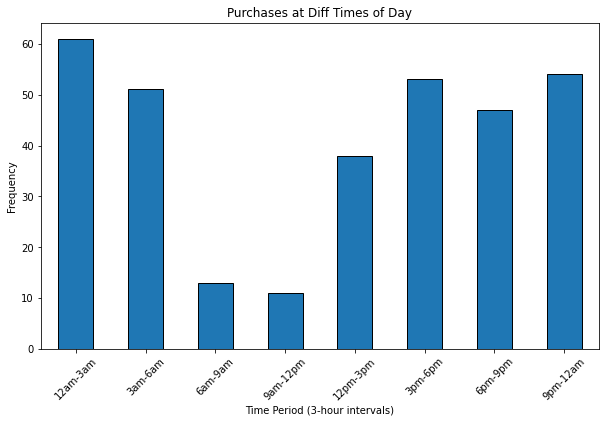

In [6]:
plt.figure(figsize=(10, 6))
trans_df['time_period'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Time Period (3-hour intervals)')
plt.ylabel('Frequency')
plt.title('Purchases at Diff Times of Day')
plt.xticks(rotation=45)
plt.show()


In [7]:
def shorten(input_string):
    """Return the first 20 characters of the title."""
    return input_string[:20]

In [8]:
# Which products are sellign the most?
products = {}
for title in trans_df['title']:
    if shorten(title) in products:
        products[shorten(title)] += 1
    else:
        products[shorten(title)] = 1

In [9]:
print(products)

{'They Don&#39;t Under': 8, 'Autism Vintage T-Shi': 20, 'Minye TShirt | Curse': 13, 'Rippit - Funny Unise': 16, 'Existence is Pain Au': 6, 'Autistic and Gay Ske': 14, 'Sex Drive? I Don&#39': 2, 'Sir Cumcise Unisex T': 2, 'Capybara Bootleg Edi': 6, 'Apple Cat Meme “Four': 10, 'Three Capybaras Comf': 3, 'Jorking it - Cursed ': 16, 'i suffer from mental': 3, 'I Love Miners Unisex': 10, 'A Clean Beaver Alway': 1, 'The Horrors Persist,': 1, 'War Cat in the Battl': 4, 'EXPRESS* My ass is p': 1, 'Feminism Sigma Donke': 24, 'Fried Chicken 420 Sh': 1, 'Born to Dilly Dally,': 3, 'Support Your Local P': 3, 'Sink the Rich Unisex': 1, 'Your Mom University ': 1, 'Vintage 90s I Got Th': 1, 'Why Yes I&#39;m An A': 6, 'Fight or Flxight, Cu': 9, 'I&#39;m Down To Fry ': 2, 'Yellowstone National': 5, 'She King on My Gizza': 2, 'Duckling With A Knif': 1, 'Smoking Kills Smokin': 1, 'Diabetes Conqueror U': 1, 'INternet CELebrity U': 3, 'Hoy Triste Cat Shirt': 2, 'The United Steaks of': 4, 'Screw Osha, Certif

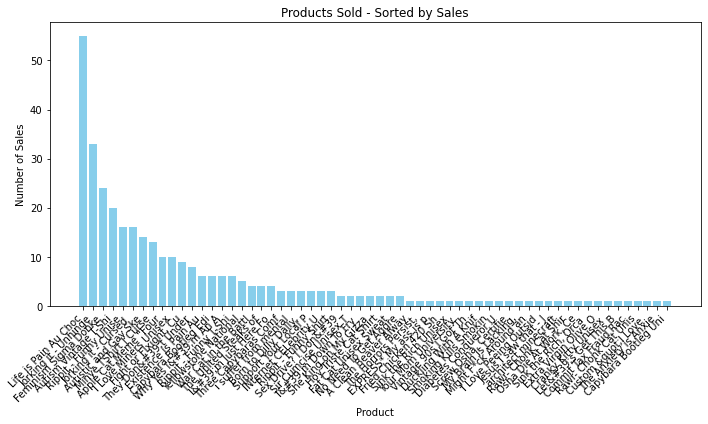

In [10]:
# Sort the dictionary by values (highest first)
sorted_products = dict(sorted(products.items(), key=lambda item: item[1], reverse=True))

# Extract keys and values
product_names = list(sorted_products.keys())
sales_counts = list(sorted_products.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(product_names, sales_counts, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.title('Products Sold - Sorted by Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


## What tags have been having the most amount of favorite?

In [12]:
list_df.head()

,listing_id,user_id,shop_id,title,description,state,creation_timestamp,created_timestamp,ending_timestamp,original_creation_timestamp,...,style,file_data,has_variations,should_auto_renew,language,price,taxonomy_id,production_partners,skus,views
0,1745174738,879431180,48928507,"Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...","Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...",active,1724727169,1724727169,1735271569,1720545230,...,[],NaN,True,False,en-US,"{'amount': 3142, 'divisor': 100, 'currency_cod...",482,"[{'production_partner_id': 3683250, 'partner_n...","['33995262872783106264', '22258385990132218479...",195
1,1749716510,879431180,48928507,"Minye TShirt | Cursed Shirt, Weirdcore, Shirt ...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,active,1724722013,1724722013,1735266413,1721311164,...,[],NaN,True,False,en-US,"{'amount': 3142, 'divisor': 100, 'currency_cod...",482,"[{'production_partner_id': 3683250, 'partner_n...","['19700659275141738415', '26502731880142906403...",366
2,1679319195,879431180,48928507,"Autism Vintage T-Shirt, Retro Metal Shirt, Fun...",📦 SHIPPING\n\nCOMFORT COLORS:\nWe ship and ful...,active,1724692361,1724692361,1735236761,1708052718,...,[],NaN,True,False,en-US,"{'amount': 3142, 'divisor': 100, 'currency_cod...",482,"[{'production_partner_id': 3683250, 'partner_n...","['22582550147639283000', '87341109126881044820...",1539
3,1752206842,879431180,48928507,"They Don&#39;t Understand Alpha Wolf Shirt, Un...",📦 SHIPPING\n\nCOMFORT COLORS (Pepper):\nWe shi...,active,1724692361,1724692361,1735236761,1721683623,...,[],NaN,True,False,en-US,"{'amount': 3142, 'divisor': 100, 'currency_cod...",482,"[{'production_partner_id': 3683250, 'partner_n...","['21130195237084991023', '12527616164167188451...",569
4,1640847853,879431180,48928507,"Capybara Bootleg Edit Unisex Shirt, Cute Capyb...",Our &#39;Capybara Bootleg Edit Unisex Shirt&#3...,active,1724604817,1724604817,1735149217,1703130334,...,[],NaN,True,False,en-US,"{'amount': 3142, 'divisor': 100, 'currency_cod...",482,"[{'production_partner_id': 3683250, 'partner_n...","['10458730844763513687', '28675217801319959062...",286


In [ ]:
# Convert the strings in the 'tags' column to actual lists
list_df['tags'] = list_df['tags'].apply(ast.literal_eval)

In [32]:
# Explode the tags column to have one tag per row
df_exploded = list_df.explode('tags')

# Display the exploded DataFrame
print(df_exploded)


     listing_id    user_id   shop_id  \
0    1745174738  879431180  48928507   
0    1745174738  879431180  48928507   
0    1745174738  879431180  48928507   
0    1745174738  879431180  48928507   
0    1745174738  879431180  48928507   
..          ...        ...       ...   
133  1645291547  879431180  48928507   
133  1645291547  879431180  48928507   
133  1645291547  879431180  48928507   
133  1645291547  879431180  48928507   
133  1645291547  879431180  48928507   

                                                 title  \
0    Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...   
0    Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...   
0    Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...   
0    Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...   
0    Sir Cumcise Unisex Tshirt, Unhinged Shirt, Cur...   
..                                                 ...   
133  Kitten Overlords Unisex Tshirt, Cat Shirt, Cat...   
133  Kitten Overlords Unisex Tshirt, Cat Shirt, Cat... 

In [40]:
# Group by the tags and sum the favorers for each tag
tag_weights = df_exploded.groupby('tags')['num_favorers'].mean()

# Display the tag weights
print(tag_weights)


tags
2000s shirt              0.0
2000s style shirt        3.0
3 Wolf Shirt             1.0
420 Blaze It Shirt      65.5
420 TShirt             124.0
                       ...  
yo momma joke            1.0
you're on drugs          5.0
your mom shirt           1.0
your mom university      1.0
zu za zazu               2.0
Name: num_favorers, Length: 1195, dtype: float64


In [41]:
# Sort the tags by their weights (favorers sum) in descending order
sorted_tag_weights = tag_weights.sort_values(ascending=False)

# Display the sorted tag weights
print(sorted_tag_weights)


tags
Gifts For Friends      1244.0
Funny Ironic Tshirt    1244.0
Cursed                  685.0
Stupid Shirt            664.0
Funny Meme Shirt        646.5
                        ...  
Y2K Aesthetic             0.0
Workout Shirt             0.0
oversized t-shirt         0.0
USA Shirt                 0.0
2000s shirt               0.0
Name: num_favorers, Length: 1195, dtype: float64


In [37]:
sorted_tag_weights[:10]

tags
Unhinged Shirt         1506
Weird Shirt            1503
Cursed Shirt           1419
Weirdcore Shirt        1377
Gen Z Meme             1377
Unhinge Shirt          1373
Cursed                 1370
weirdcore              1360
Stupid Shirt           1328
Inappropriate Shirt    1296
Name: num_favorers, dtype: int64

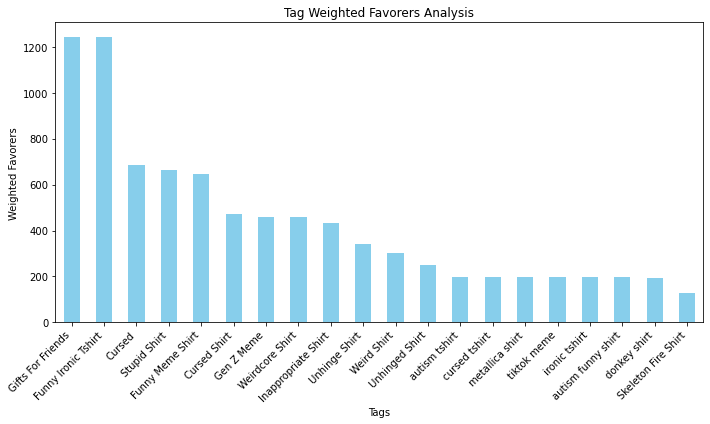

In [43]:
import matplotlib.pyplot as plt

# Plotting the weighted favorers for each tag
plt.figure(figsize=(10, 6))
sorted_tag_weights[:20].plot(kind='bar', color='skyblue')
plt.xlabel('Tags')
plt.ylabel('Weighted Favorers')
plt.title('Tag Weighted Favorers Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
